<a href="https://colab.research.google.com/github/caishaosmanper/Visualization-Project/blob/main/Group_2_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Group Exercise on World Happiness Data - Group 2

"The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by the Gallup World Poll data. The World Happiness Report reflects a worldwide demand for more attention to happiness and well-being as criteria for government policy. It reviews the state of happiness in the world today and shows how the science of happiness explains personal and national variations in happiness.

Life evaluations from the Gallup World Poll provide the basis for the annual happiness rankings. They are based on answers to the main life evaluation question. The Cantril ladder asks respondents to think of a ladder, with the best possible life for them being a 10 and the worst possible life being a 0. They are then asked to rate their own current lives on a 0 to 10 scale. The rankings are from nationally representative samples over three years.

We use observed data on the six variables and estimates of their associations with life evaluations to explain the variation across countries. They include GDP per capita, social support, healthy life expectancy, freedom, generosity, and corruption. Our happiness rankings are not based on any index of these six factors – the scores are instead based on individuals’ own assessments of their lives, in particular, their answers to the single-item Cantril ladder life-evaluation question, much as epidemiologists estimate the extent to which life expectancy is affected by factors such as smoking, exercise, and diet."

Source: https://www.kaggle.com/datasets/usamabuttar/world-happiness-report-2005-present 

Importing the libraries

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import folium
import json

In [34]:
data_ori = pd.read_csv("World Happiness Report.csv")
data_ori.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


Data Cleaning

In [35]:
data_ori.isnull().sum()

Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64

In [36]:
data = data_ori.dropna(inplace = False)

In [37]:
data.describe()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
count,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000
mean,2013.925728,5.484487,9.355232,0.812622,63.151230,0.748815,0.002644,0.750696,0.659376,0.269064,0.483957
std,4.405145,1.149633,1.154303,0.121037,7.178640,0.136542,0.162249,0.185503,0.105602,0.081819,0.192992
min,2005.000000,2.178809,5.526723,0.290934,6.720000,0.260069,-0.337527,0.035198,0.178886,0.094316,0.078787
25%,2010.000000,4.620406,8.427542,0.743757,58.420000,0.659158,-0.106054,0.698389,0.578062,0.208157,0.333443
50%,2014.000000,5.431614,9.508173,0.839280,65.000000,0.768174,-0.021610,0.806596,0.670486,0.259691,0.468150
75%,2018.000000,6.319366,10.316836,0.909040,68.924999,0.856921,0.095830,0.874650,0.744015,0.318330,0.618612
max,2021.000000,7.970892,11.663788,0.987343,74.349998,0.985178,0.702708,0.983276,0.883586,0.606713,0.993604


In [38]:
data.corr()

<ipython-input-38-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
Year,1.000000,0.071749,0.101946,0.007045,0.183644,0.245680,-0.008085,-0.106063,0.015243,0.246212,0.030618
Life Ladder,0.071749,1.000000,0.792572,0.720615,0.735161,0.542297,0.193739,-0.492163,0.512842,-0.309755,-0.068647
Log GDP Per Capita,0.101946,0.792572,1.000000,0.701313,0.834306,0.386081,-0.005916,-0.391091,0.246365,-0.268648,-0.183112
Social Support,0.007045,0.720615,0.701313,1.000000,0.606491,0.429717,0.071150,-0.249762,0.453113,-0.430832,-0.160869
Healthy Life Expectancy At Birth,0.183644,0.735161,0.834306,0.606491,1.000000,0.399726,0.025713,-0.337034,0.249245,-0.136442,-0.172104
Freedom To Make Life Choices,0.245680,0.542297,0.386081,0.429717,0.399726,1.000000,0.319194,-0.506642,0.572970,-0.239396,0.422720
Generosity,-0.008085,0.193739,-0.005916,0.071150,0.025713,0.319194,1.000000,-0.289985,0.321720,-0.096840,0.295769
Perceptions Of Corruption,-0.106063,-0.492163,-0.391091,-0.249762,-0.337034,-0.506642,-0.289985,1.000000,-0.307226,0.284118,-0.455981
Positive Affect,0.015243,0.512842,0.246365,0.453113,0.249245,0.572970,0.321720,-0.307226,1.000000,-0.293541,0.126667
Negative Affect,0.246212,-0.309755,-0.268648,-0.430832,-0.136442,-0.239396,-0.096840,0.284118,-0.293541,1.000000,-0.144801


In [39]:
# Creating a subset of data
data_can = data[data["Country Name"] == "Canada"]
data_can

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
327,Canada,North America and ANZ,2005,7.418048,10.707299,0.961552,70.500000,0.957306,0.248033,0.502681,0.783299,0.233278,0.442818
329,Canada,North America and ANZ,2008,7.485604,10.733166,0.938707,70.680000,0.926315,0.257703,0.369588,0.802224,0.202175,0.590371
330,Canada,North America and ANZ,2009,7.487824,10.692027,0.942845,70.739998,0.915058,0.242370,0.412622,0.793211,0.247633,0.608264
331,Canada,North America and ANZ,2010,7.650346,10.711336,0.953765,70.800003,0.933949,0.226587,0.412660,0.791042,0.233113,0.551076
332,Canada,North America and ANZ,2011,7.426054,10.732532,0.921669,70.860001,0.950925,0.249269,0.432992,0.802900,0.247729,0.553291
333,Canada,North America and ANZ,2012,7.415144,10.739143,0.948128,70.919998,0.917961,0.286125,0.465602,0.775569,0.229332,0.523448
334,Canada,North America and ANZ,2013,7.593794,10.751601,0.936239,70.980003,0.916014,0.311748,0.406236,0.800634,0.262850,0.505976
335,Canada,North America and ANZ,2014,7.304258,10.769844,0.917836,71.040001,0.938898,0.265945,0.441735,0.790683,0.258602,0.516954
336,Canada,North America and ANZ,2015,7.412773,10.768951,0.939067,71.099998,0.931469,0.248908,0.427152,0.791709,0.286280,0.644104
337,Canada,North America and ANZ,2016,7.244846,10.767591,0.924393,71.150002,0.912424,0.207251,0.385090,0.767765,0.237423,0.618195


In [40]:
data_can_p = data_can[["Life Ladder"]]
data_can_p

,Life Ladder
327,7.418048
329,7.485604
330,7.487824
331,7.650346
332,7.426054
333,7.415144
334,7.593794
335,7.304258
336,7.412773
337,7.244846


## Using Matplotlib

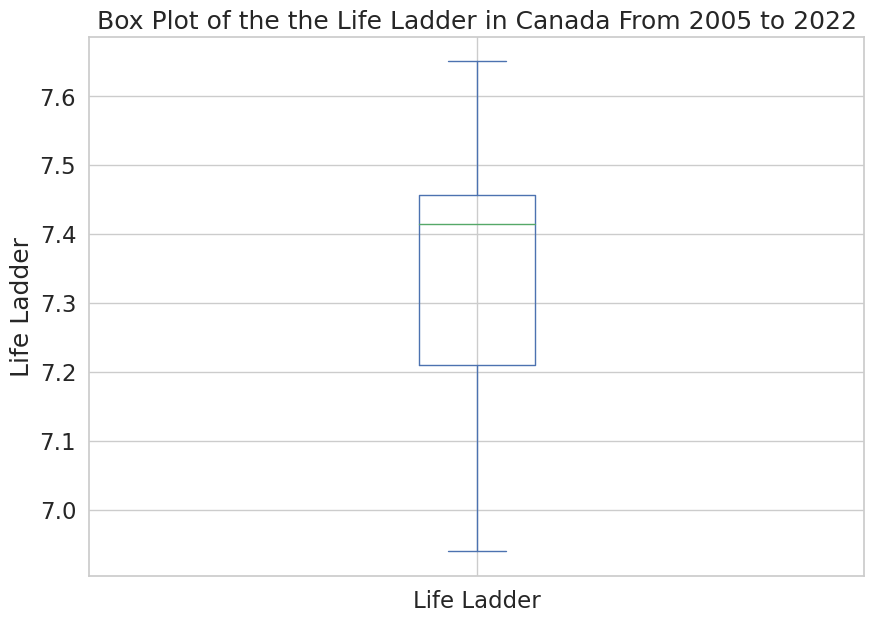

In [41]:
data_can_p.plot(kind='box', figsize=(10,7))

plt.title('Box Plot of the the Life Ladder in Canada From 2005 to 2022')
plt.ylabel("Life Ladder")

plt.show()

## Using Seaborn

<Axes: ylabel='Life Ladder'>

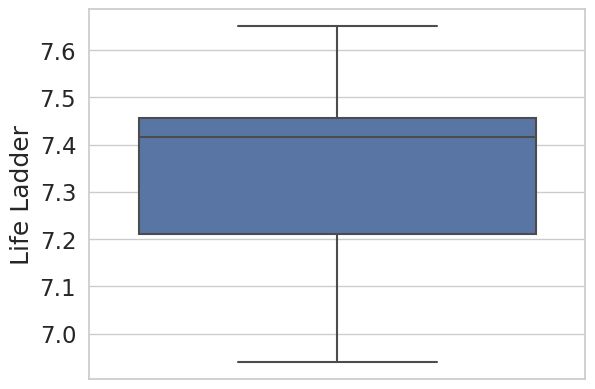

In [42]:
sns.boxplot(data=data_can_p, y=data_can_p["Life Ladder"])

## Using Plotly

In [43]:
fig = px.box(data_can_p
       ,x = "Life Ladder"
       ,color_discrete_sequence = ['red'],
       title = "Box Plot of the the Life Ladder in Canada From 2005 to 2022",
       )

fig.show()

A box plot may not be the most appropriate distrbution for our dataset. The box plot is useful in having a general description about a large set of data on how the data is distributed. In our case it should be used on summarizing the life ladder score from all countries. The group considered that a bar chart may better describe the changes in Life Ladder data in Canada over the years visually for more granualar insights.

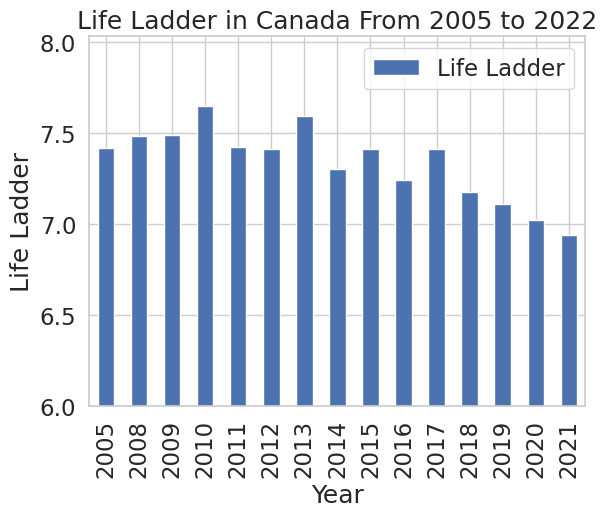

In [44]:
data_can[["Year","Life Ladder"]].plot("Year","Life Ladder", kind='bar')

plt.title('Life Ladder in Canada From 2005 to 2022')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.ylim(bottom=6)

plt.show()

The group also considered a better use of the boxplot may be to use it in visualizing the Life Ladder values of all the countries for a particular/specific year.

# **Regression Plot by Seaborn**


In [45]:
# Creating a sub-dataframe for regression analysis
df_reg = data[["Life Ladder","Log GDP Per Capita"]]
df_reg.head()


,Life Ladder,Log GDP Per Capita
0,3.723590,7.350416
1,4.401778,7.508646
2,4.758381,7.613900
3,3.831719,7.581259
4,3.782938,7.660506


<function matplotlib.pyplot.show(close=None, block=None)>

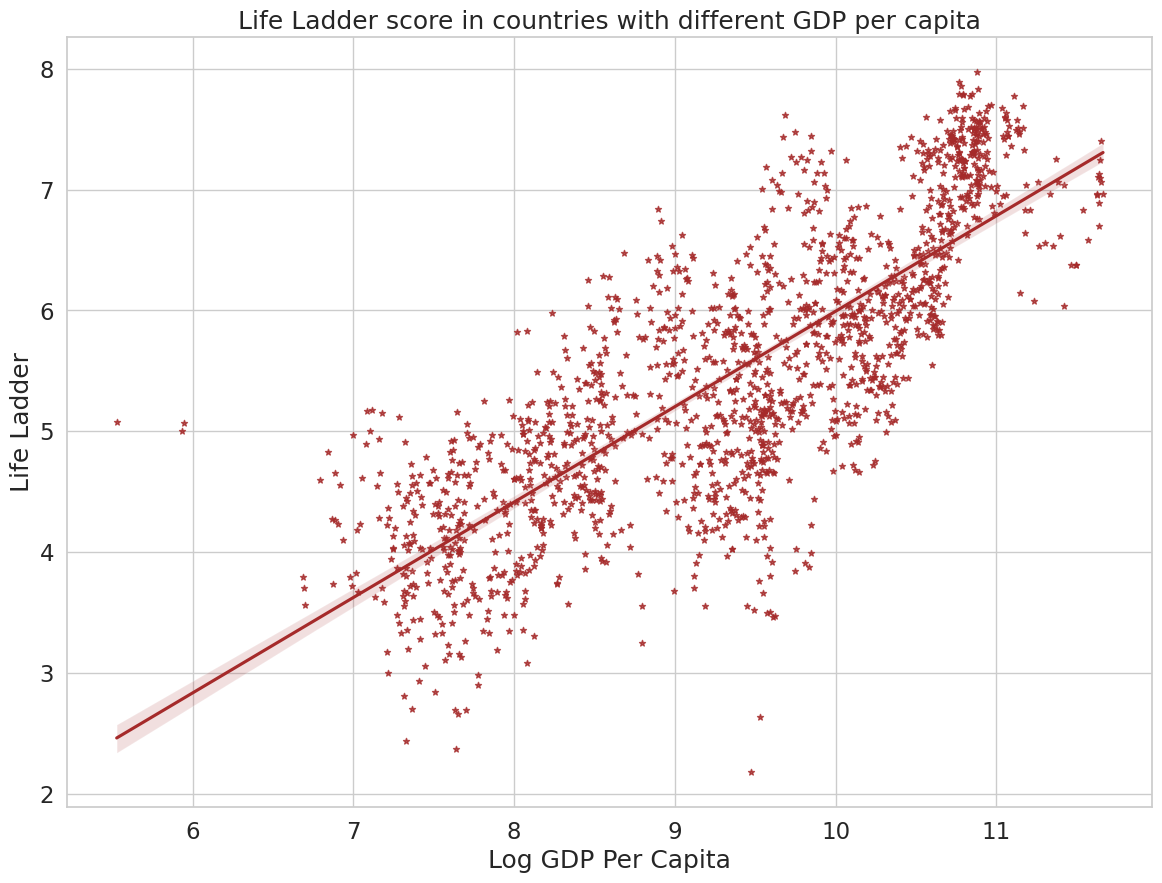

In [46]:
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.5) # Increasing the font size of title and x,y labels 
sns.set_style('whitegrid') # Setting the background to be white and includes gridlines

ax = sns.regplot(x='Log GDP Per Capita', y='Life Ladder', data=df_reg, color='brown', marker='*', scatter_kws={'s': 20})

ax.set_title('Life Ladder score in countries with different GDP per capita') # Adding title
plt.show

From the regression plot above, we can observe that there is a strong positive correlation between Log GDP Per Capita with Life Ladder score, which sounds reasonable as the countries with a higher GDP would be more developed and the general life quality there would tend to be better.

# Choropleth maps with Folium

In [47]:
#Creating the series with the average Life Ladder score grouped by countries
df_avg = data_ori.groupby("Country Name")["Life Ladder"].mean()
df_avg.head()


Country Name
Afghanistan    3.346632
Albania        5.048016
Algeria        5.377251
Angola         4.420299
Argentina      6.283633
Name: Life Ladder, dtype: float64

In [48]:
# Open the json file defines the boundaries of all world countries and store it into world_geo variable
f = open('world_countries.json')
world_geo = json.load(f)
f.close()

In [49]:
# Create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

In [51]:
# Generate choropleth map using the average Life Ladder score grouped by countries
world_map.choropleth(
    geo_data=world_geo,
    data=df_avg,
    columns=['Country Name','Life Ladder'],
    key_on='feature.properties.name',
    fill_color='RdYlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Life Ladder'
)

# Display map
world_map

From the choropleth map we can observe that the countries with low Life Ladder score are mainly located in Asia, Middle East and Africa.